In [22]:
import numpy as np
import pandas as pd
import astropy.units as u
import os

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams

%matplotlib inline
%config InlineBackend.figure_format = "retina"
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')
mpl.rcParams['axes.linewidth'] = 2


In [ ]:
# things that need to be done

# 1. do fine loading, not coarse
# 2. export data
# 3.  DataFrame is highly fragmented - remove

In [3]:
# !pip install lsdb

In [20]:
import lsdb
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch
from hipscat.inspection import plot_pixels
from hipscat.io.file_io import read_parquet_metadata

'Version of lsdb is %s' % lsdb.__version__

'Version of lsdb is 0.2.2'

In [5]:
# Gaia
gaia_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/gaia_dr3/gaia"

# ZTF
ztf_object_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/ztf/ztf_dr14/"
ztf_source_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/ztf/ztf_zource/"

In [14]:
%%time
# load lite version of Gaia DR3 for quick cone searches
# how do we do fine search
gaia_lite = lsdb.read_hipscat(gaia_path, columns=["ra", "dec"], search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))
#Load Gaia
gaia = lsdb.read_hipscat(gaia_path, search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))

CPU times: user 552 ms, sys: 108 ms, total: 660 ms
Wall time: 700 ms


In [28]:
list(read_parquet_metadata(os.path.join(gaia_path, "_common_metadata")).schema)[:2]

[<ParquetColumnSchema>
   name: _hipscat_index
   path: _hipscat_index
   max_definition_level: 1
   max_repetition_level: 0
   physical_type: INT64
   logical_type: Int(bitWidth=64, isSigned=false)
   converted_type (legacy): UINT_64,
 <ParquetColumnSchema>
   name: solution_id
   path: solution_id
   max_definition_level: 1
   max_repetition_level: 0
   physical_type: INT64
   logical_type: None
   converted_type (legacy): NONE]

In [18]:
gaia_lite_computed = gaia_lite.compute()

In [30]:
gaia_lite

,ra,dec
npartitions=6,,
3643412098542731264,float64,float64
3644537998449573888,...,...
...,...,...
3653545197704314880,...,...
18446744073709551615,...,...


In [29]:
gaia_lite_computed

,ra,dec
_hipscat_index,,
3643412099679387648,300.938807,16.959530
3643412100069457920,300.939196,16.960282
3643412100413390848,300.938070,16.960664
3643412102065946624,300.938019,16.961057
3643412107736645632,300.934457,16.961220
...,...,...
3654671088115253248,299.533488,23.313408
3654671088761176064,299.533875,23.314336
3654671089591648256,299.527580,23.311197


In [7]:
%%time
ztf_object = lsdb.read_hipscat(ztf_object_path, columns=["ra", "dec"]) # ZTF Object
ztf_source = lsdb.read_hipscat(ztf_source_path, columns=["ra", "dec"]) # ZTF Source

CPU times: user 2.15 s, sys: 328 ms, total: 2.48 s
Wall time: 2.85 s


In [8]:
ztf_object

,ra,dec
npartitions=2352,,
0,float64,float64
18014398509481984,...,...
...,...,...
13830554455654793216,...,...
18446744073709551615,...,...


In [9]:
ztf_source

,ra,dec
npartitions=41679,,
0,float64,float64
4503599627370496,...,...
...,...,...
13833932155375321088,...,...
18446744073709551615,...,...


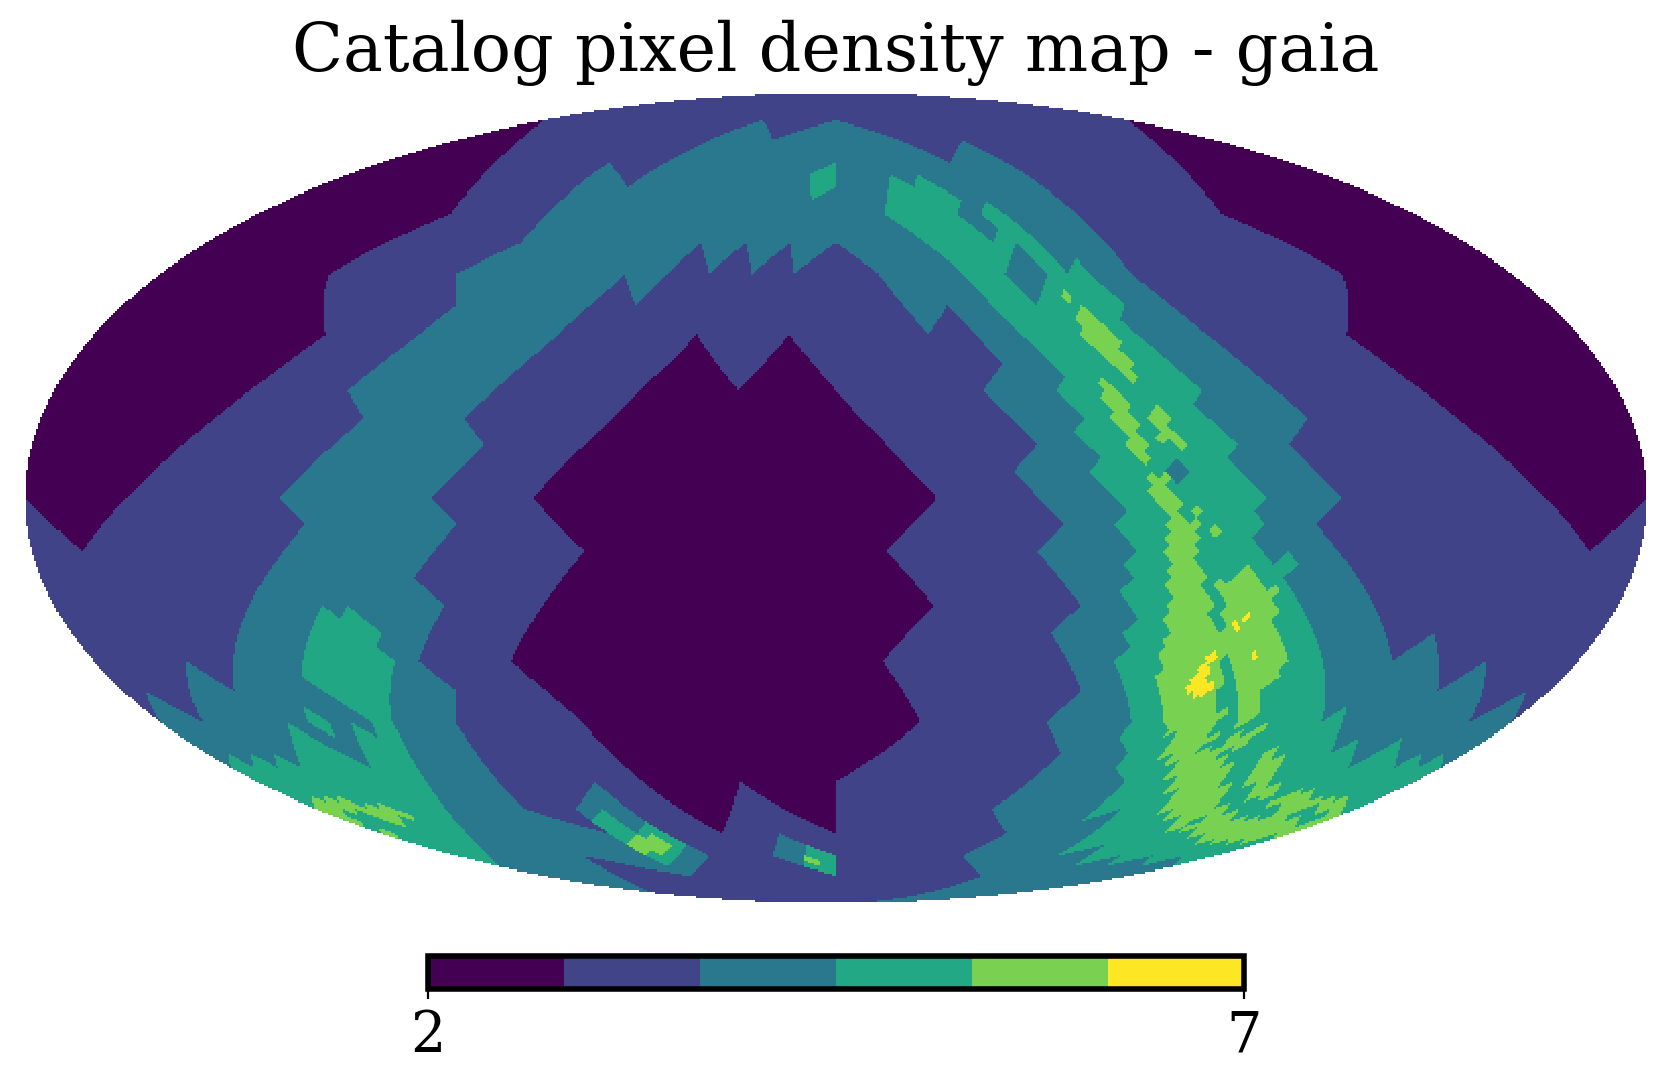

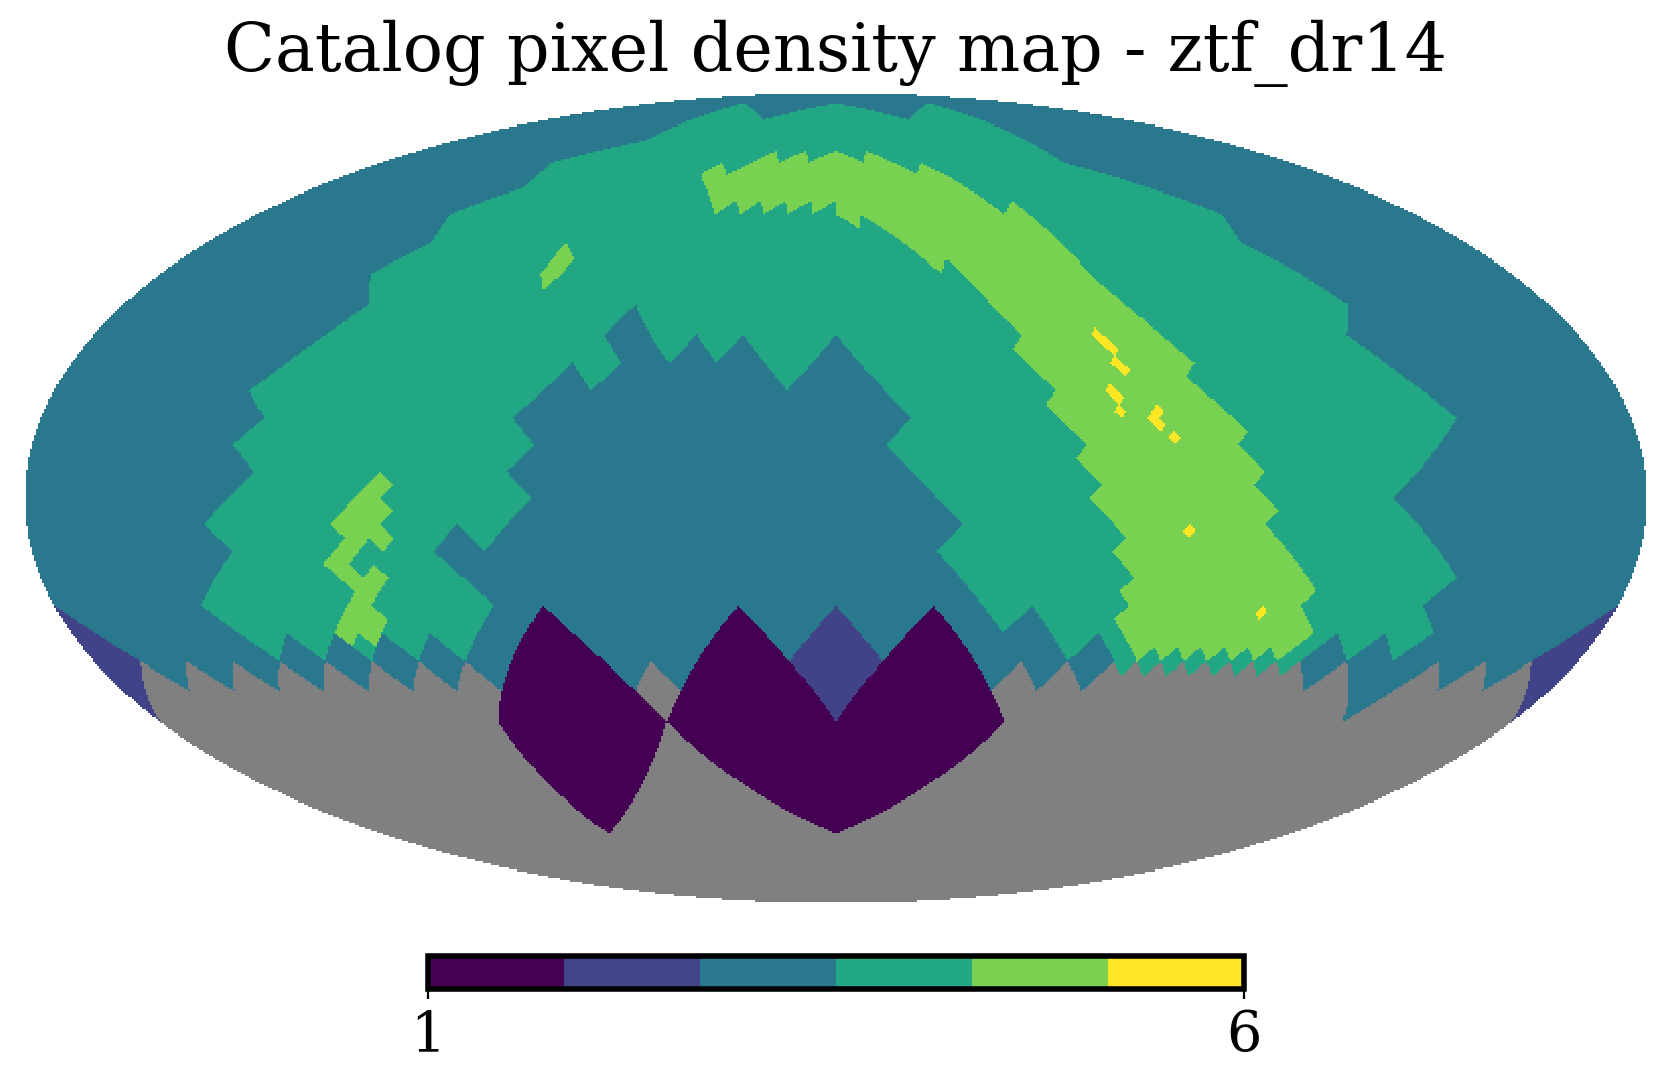

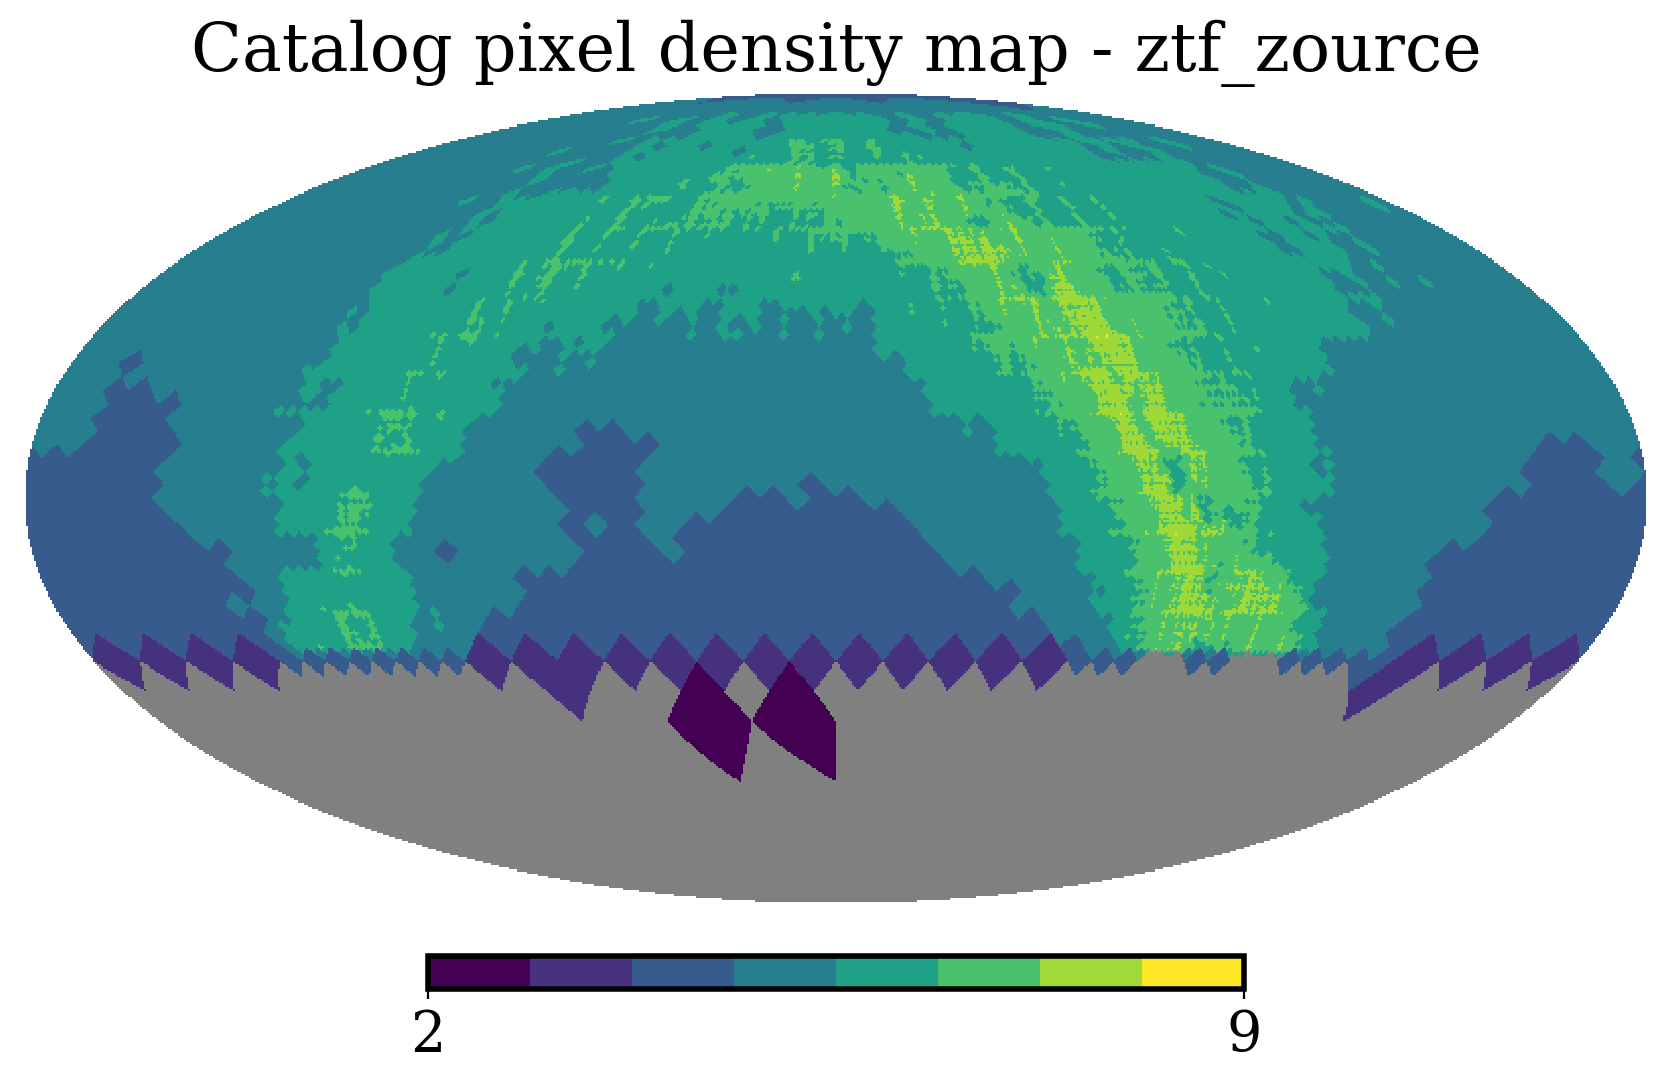

In [10]:
# Plot the Pixel Density Maps for Gaia and ZTF

plot_pixels(gaia.hc_structure)
plot_pixels(ztf_object.hc_structure)
plot_pixels(ztf_source.hc_structure)

In [11]:
# Cross-match Gaia and ZTF
%time 
xmatch_object = gaia_lite.crossmatch(ztf_object)

xmatch_object.head(5)

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 19.3 µs


/epyc/users/ncaplar/anaconda3/envs/tape_static/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,ra_gaia,dec_gaia,ra_ztf_dr14,dec_ztf_dr14,_dist_arcsec
_hipscat_index,,,,,
3643412099679387648,300.938807,16.959530,300.938812,16.959557,0.096993
3643412100069457920,300.939196,16.960282,300.939191,16.960302,0.076818
3643412100413390848,300.938070,16.960664,300.938068,16.960826,0.584654
3643412102065946624,300.938019,16.961057,300.938068,16.960826,0.846288
3643412107736645632,300.934457,16.961220,300.934442,16.961234,0.069840


In [8]:
# load the margins?

In [9]:
# Reading HiPSCat's from an 'almanac' ?

In [12]:
%%time
# load ZTF with all columns here
ztf_object_full = lsdb.read_hipscat(ztf_object_path)

CPU times: user 325 ms, sys: 57.8 ms, total: 383 ms
Wall time: 499 ms


In [15]:
%%time
# crossmatch ZTF + Gaia
_all_sky_object = gaia.crossmatch(ztf_object_full).query(
    "nobs_g_ztf_dr14 > 50 and nobs_r_ztf_dr14 > 50 and \
    parallax_gaia > 0 and parallax_over_error_gaia > 5 and \
    teff_gspphot_gaia > 5380 and teff_gspphot_gaia < 7220 and logg_gspphot_gaia > 4.5 \
    and logg_gspphot_gaia < 4.72 and classprob_dsc_combmod_star_gaia > 0.5")

/epyc/users/ncaplar/anaconda3/envs/tape_static/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


CPU times: user 253 ms, sys: 13.8 ms, total: 267 ms
Wall time: 266 ms


In [16]:
%%time 
total = _all_sky_object.compute()

/epyc/users/ncaplar/anaconda3/envs/tape_static/lib/python3.10/site-packages/lsdb/core/crossmatch/kdtree_match.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  left_join_part = self.left.iloc[left_idx].reset_index()
/epyc/users/ncaplar/anaconda3/envs/tape_static/lib/python3.10/site-packages/lsdb/core/crossmatch/abstract_crossmatch_algorithm.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col] = new_col
/epyc/users/ncaplar/anaconda3/envs/tape_static/lib/python3.10/site-packages/lsdb/core/crossmatch/kdtree_match

CPU times: user 50.6 s, sys: 4min 4s, total: 4min 55s
Wall time: 59.9 s


In [17]:
total.head(5)

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
3643413275007254528,1636148068921376768,Gaia DR3 1821706637701187200,1821706637701187200,372376383,2016.0,300.994010,0.031234,17.012684,0.024773,0.608951,...,56,98,0,16.662648,16.020428,NaN,5,0,3236,0.083317
3643414806045655040,1636148068921376768,Gaia DR3 1821707393615573888,1821707393615573888,270237472,2016.0,300.918962,0.032737,17.045524,0.027808,0.390358,...,56,98,0,16.828846,16.213753,NaN,5,0,3236,0.080489
3643415430317473792,1636148068921376768,Gaia DR3 1821707698546214272,1821707698546214272,864928606,2016.0,300.941856,0.052227,17.048924,0.044048,1.167348,...,55,98,0,17.669216,16.670712,NaN,5,0,3236,0.146554
3643416488817197056,1636148068921376768,Gaia DR3 1821708213935407488,1821708213935407488,1598760376,2016.0,300.934786,0.033041,17.107908,0.031840,0.514579,...,55,98,0,17.153486,16.486329,NaN,5,0,3236,0.064002
3643416611496394752,1636148068921376768,Gaia DR3 1821708286968620672,1821708286968620672,1668236203,2016.0,301.028256,0.038429,17.055523,0.036194,0.372974,...,56,98,0,17.366521,16.772852,NaN,5,0,3236,0.101270


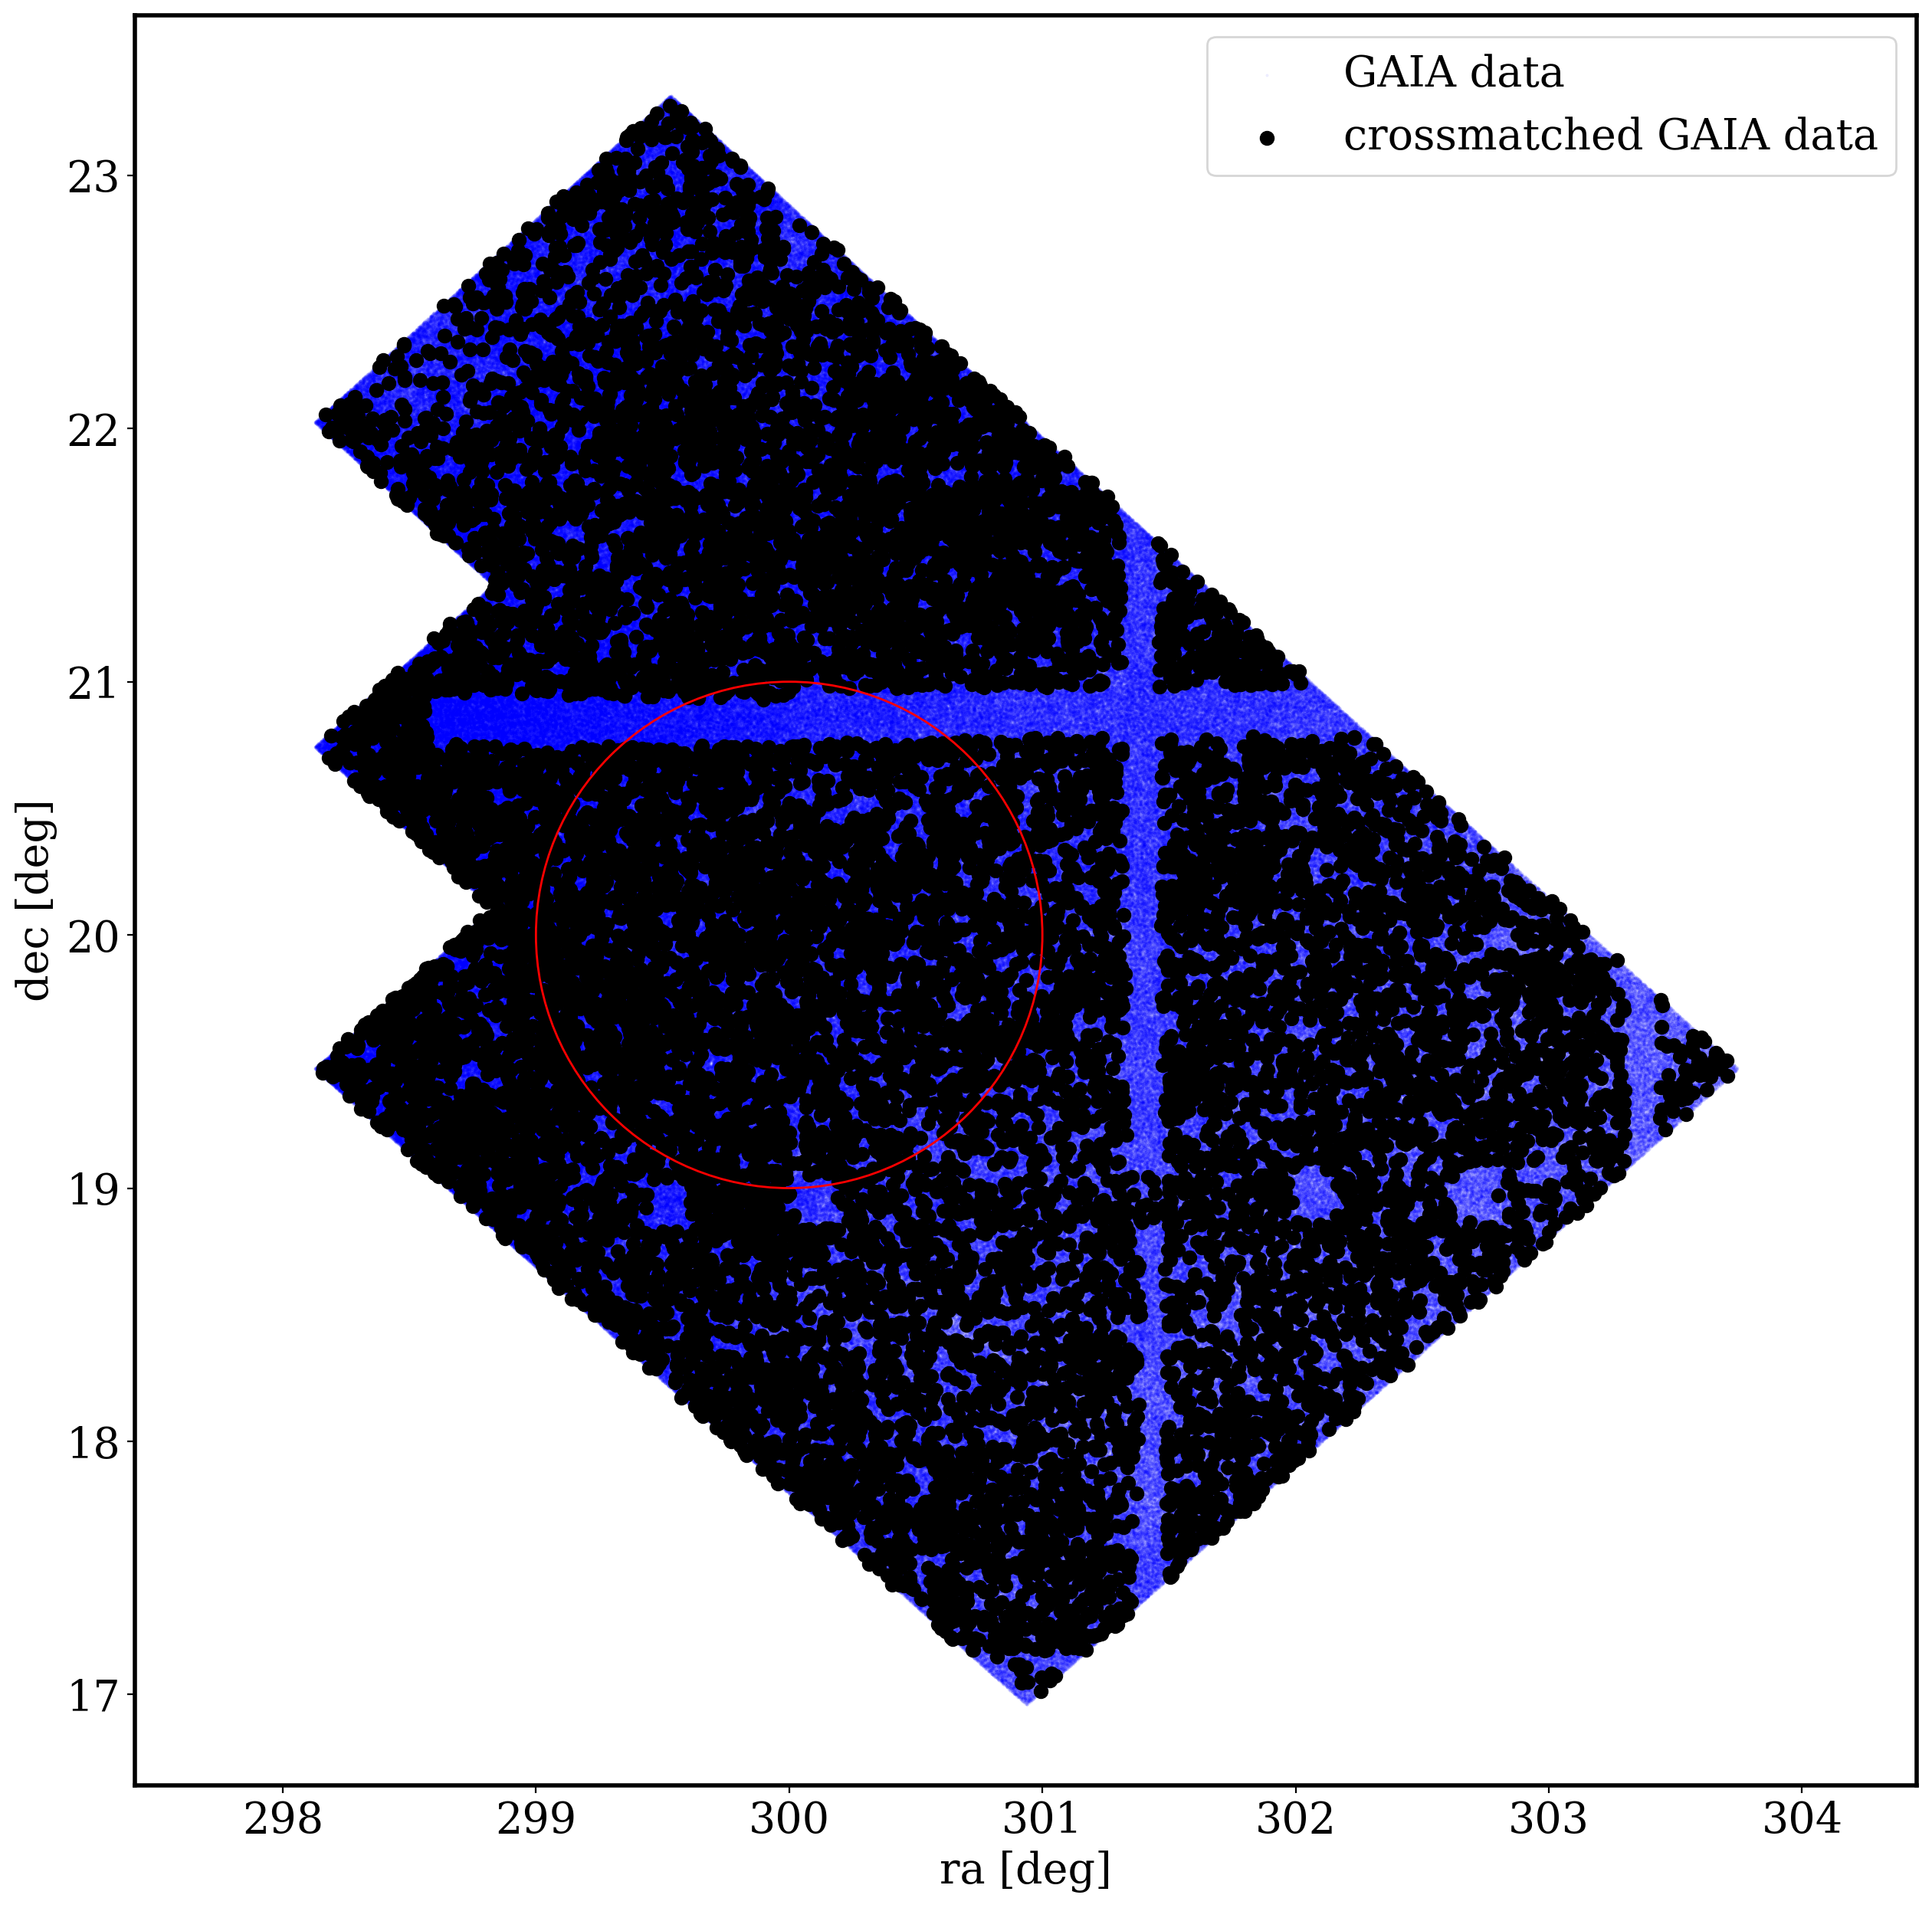

In [38]:
plt.figure(figsize=(15,15))

plt.scatter(gaia_lite_computed['ra'], gaia_lite_computed['dec'], color='blue', s=0.1, alpha=0.1, label='GAIA data')
plt.scatter(total['ra_gaia'].values, total['dec_gaia'].values, color='black', label='crossmatched GAIA data')
# Create a circle patch
circle = patches.Circle((300, 20), 1, edgecolor='red', facecolor='lightblue', fill=False)
plt.axis('equal')
# Use plt.gca() to get the current axes and add the circle to it
plt.gca().add_patch(circle)
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.legend()

In [ ]:
# export crossmatched data 